Text(0, 0.5, 'Tiempo de ejecución (segs)')

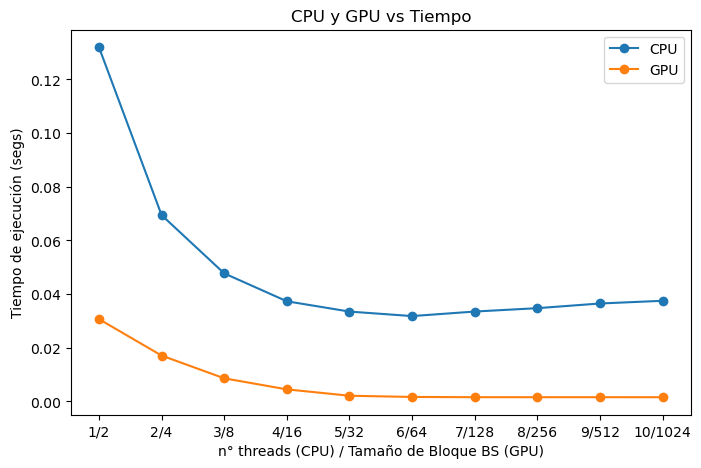

In [24]:
import matplotlib.pyplot as plt

n_threads = ["1/2", "2/4", "3/8", "4/16", "5/32", "6/64", "7/128", "8/256", "9/512", "10/1024"]
tiempoNT = [0.131991, 0.069433, 0.047726, 0.037323, 0.033486, 0.031812, 0.033500, 0.034759, 0.036500, 0.037507]
tiempoBS = [0.030684, 0.017095, 0.008622, 0.004504, 0.002126, 0.001676, 0.001587, 0.001581, 0.001589, 0.001575]

plt.figure(figsize=(8,5))
plt.plot(n_threads, tiempoNT, marker="o", label="CPU")
plt.plot(n_threads, tiempoBS, marker="o", label="GPU")
plt.legend()
plt.title("CPU y GPU vs Tiempo")
plt.xlabel("n° threads (CPU) / Tamaño de Bloque BS (GPU)")
plt.ylabel("Tiempo de ejecución (segs)")


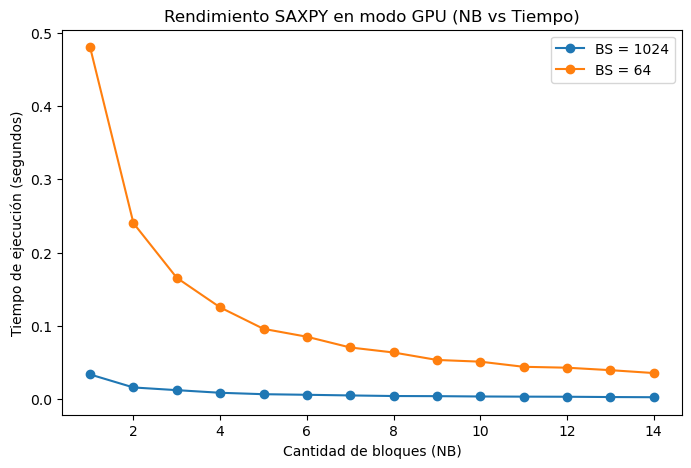

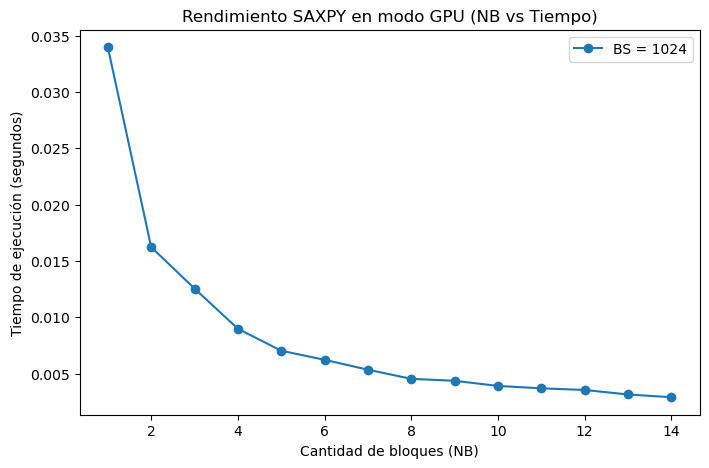

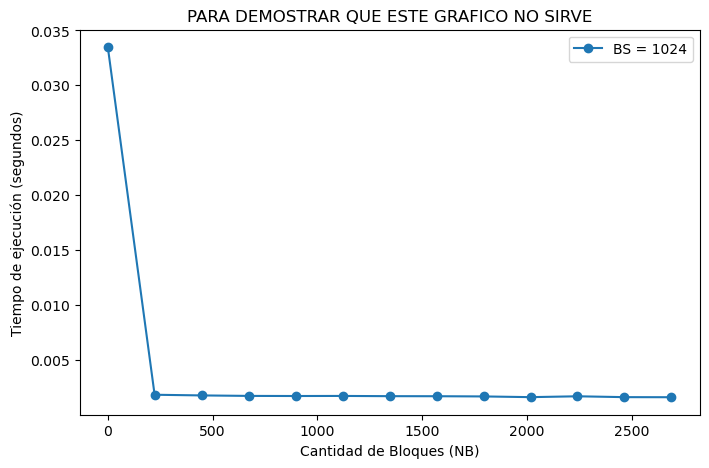

In [51]:
import matplotlib.pyplot as plt


NB = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
t1 = [0.033964, 0.016226, 0.012548, 0.008982, 0.007033, 0.006226, 0.005348, 0.004538, 0.004365, 0.003908, 0.003696, 0.003551, 0.003149, 0.002907]
t2 = [0.480170, 0.240240, 0.165697, 0.125379, 0.096140, 0.085388, 0.070733, 0.063901, 0.053733, 0.051382, 0.044394, 0.043161, 0.039806, 0.035869]
# Grafico para comparar BS=1024 vs BS=64
plt.figure(figsize=(8,5))
plt.plot(NB, t1, marker='o', label="BS = 1024")
plt.plot(NB, t2, marker='o', label="BS = 64")
plt.xlabel('Cantidad de bloques (NB)')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Rendimiento SAXPY en modo GPU (NB vs Tiempo)')
plt.legend()
plt.show()

# Grafico para ver el comportamiento cuando BS=1024 y NB cambia
plt.figure(figsize=(8,5))
plt.plot(NB, t1, marker='o', label="BS = 1024")
plt.xlabel('Cantidad de bloques (NB)')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Rendimiento SAXPY en modo GPU (NB vs Tiempo)')
plt.legend()
plt.show()

# Grafico que no sirve
BS = [1, 224, 448, 672, 896, 1120, 1344, 1568, 1792, 2016, 2240, 2464, 2688]
tiempo = [0.033471, 0.001833, 0.001772, 0.001728, 0.001718, 0.001725, 0.001704, 0.001699, 0.001680, 0.001615, 0.001693, 0.001615, 0.001608]
plt.figure(figsize=(8,5))
plt.plot(BS, tiempo, marker='o', label="BS = 1024")
plt.title("PARA DEMOSTRAR QUE ESTE GRAFICO NO SIRVE")
plt.xlabel("Cantidad de Bloques (NB)")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.legend()
plt.show()




1.901 2.766 3.536 3.942 4.149 3.94 3.797 3.616 3.519
1.795 3.559 6.813 14.433 18.308 19.335 19.408 19.31 19.482


Text(0, 0.5, 'SpeedUp')

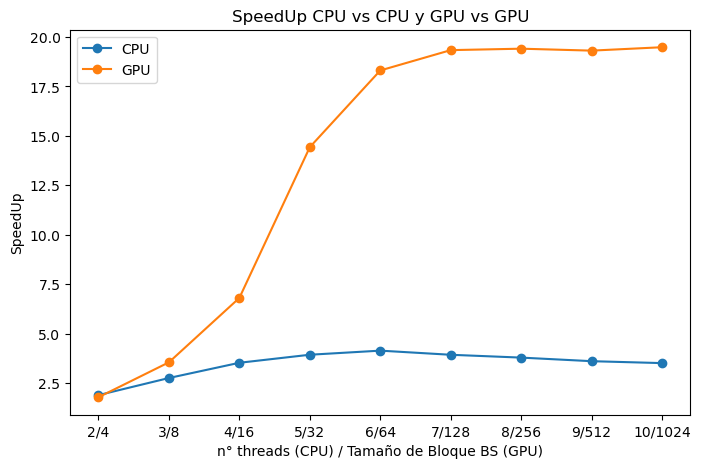

In [73]:
def imprime(arr):
    print(' '.join(str(x) for x in arr))

tiempoNT = [0.131991, 0.069433, 0.047726, 0.037323, 0.033486, 0.031812, 0.033500, 0.034759, 0.036500, 0.037507]
tiempoBS = [0.030684, 0.017095, 0.008622, 0.004504, 0.002126, 0.001676, 0.001587, 0.001581, 0.001589, 0.001575]

speedupNT = []
for i in range(1,len(tiempoNT)):
    speedupNT.append(round(tiempoNT[0]/tiempoNT[i], 3))
imprime(speedupNT)

speedupBS = []
for i in range(1,len(tiempoBS)):
    speedupBS.append(round(tiempoBS[0]/tiempoBS[i], 3))
imprime(speedupBS)

# Cantidad de thread usados (CPU) / Tamaño del bloque BS (GPU) 
# Excluyo "1/2" ya que son la referencia para hacer el SpeedUp
n_threads = ["2/4", "3/8", "4/16", "5/32", "6/64", "7/128", "8/256", "9/512", "10/1024"]
plt.figure(figsize=(8,5))
plt.plot(n_threads, speedupNT, marker="o", label="CPU")
plt.plot(n_threads, speedupBS, marker="o", label="GPU")
plt.legend()
plt.title("SpeedUp CPU vs CPU y GPU vs GPU")
plt.xlabel("n° threads (CPU) / Tamaño de Bloque BS (GPU)")
plt.ylabel("SpeedUp")




0.411 7.5556 12.2571 15.8641 17.4769 18.6981 19.5669 20.5886 20.6957 21.3892 21.1013 22.0578 22.1333 22.7677 23.3942 23.4366 23.4704 23.0412 23.3629 23.212


Text(0, 0.5, 'SpeedUp')

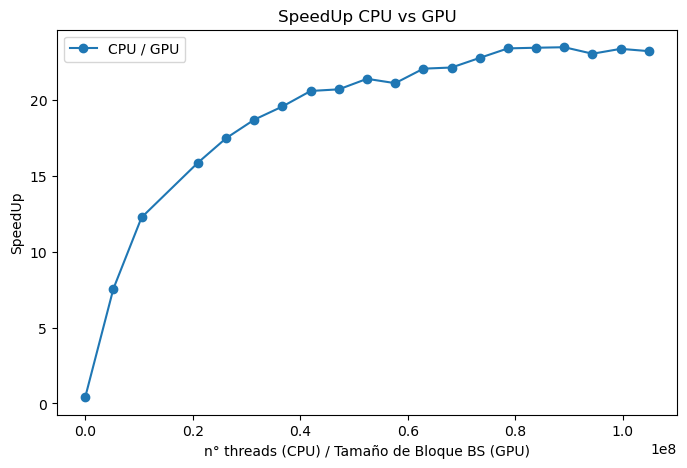

In [95]:
#  nthreads=10, BS=1024, NB=-1		    4           5       6       7           8       9           10        11        12         13       14         15       16          17       18         19      
n = [1, 5242880, 10485760, 20971520, 26214400, 31457280, 36700160, 41943040, 47185920, 52428800, 57671680, 62914560, 68157440, 73400320, 78643200, 83886080, 89128960, 94371840, 99614720, 104857600]
tiempo_CPU = [0.000067, 0.002040, 0.004290, 0.007821, 0.009822, 0.011705, 0.013599, 0.015915, 0.017819, 0.019400, 0.020405, 0.022896, 0.024568, 0.027048, 0.029079, 0.032155, 0.034079, 0.034101, 0.035792, 0.039089]
tiempo_GPU = [0.000163, 0.000270, 0.000350, 0.000493, 0.000562, 0.000626, 0.000695, 0.000773, 0.000861, 0.000907, 0.000967, 0.001038, 0.001110, 0.001188, 0.001243, 0.001372, 0.001452, 0.001480, 0.001532, 0.001684]
#                  0        1       2           3           4       5           6       7       8           9          10       11          12       13         14      15        16          17       18       19      
SpeedUp = []
for i in range(len(tiempo_CPU)):
    SpeedUp.append(round(tiempo_CPU[i]/tiempo_GPU[i],4))
imprime(SpeedUp)

plt.figure(figsize=(8,5))
plt.plot(n, SpeedUp, marker="o", label="CPU / GPU")
plt.legend()
plt.title("SpeedUp CPU vs GPU")
plt.xlabel("n° threads (CPU) / Tamaño de Bloque BS (GPU)")
plt.ylabel("SpeedUp")

